Case Study: How Does a Bike-Share Navigate Speedy Success?
============================================================
## introduction 
This is a case study about the **Cyclistic bike-share analysis**, in this case, I will be analyzed by following the steps of **the data analysis process: ask, prepare, process, analyze, share, and act**.

### About the Company
In 2016, **Cyclistic** launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system at any time.

### Business task:
Analyze the Cyclistic data set for one year to understand how annual members and casual riders use Cyclistic bikes differently.

### Stakeholders:

**Lily Moreno**: The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.
**Cyclistic marketing analytics team: ** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
**Cyclistic executive team**: The executive team will decide whether to approve the recommended marketing program.

### Deliverables:

> - A description of all data sources used
> - Documentation of any cleaning or manipulation of data
> - A summary of the analysis
> - Supporting visualizations and key findings
> - Top three to four recommendations based on the analysis

## STEP ONE: **ASK**
**Lily Moreno**(The director of marketing and my manager) has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. To do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends by asking three questions that will guide the future marketing program:

**1.** How do annual members and casual riders use Cyclistic bikes differently?

**2.** Why would casual riders buy Cyclistic annual memberships?

**3.** How can Cyclistic use digital media to influence casual riders to become members?

**Moreno** has assigned you the first question to answer: **How do annual members and casual riders use Cyclistic bikes differently?**, to answer this question I should prepare data by collecting it from a trusted source.

## STEP TWO: PREPARE
the raw data is located in [here](https://divvy-tripdata.s3.amazonaws.com/index.html), and it is publicly available under this [license](https://ride.divvybikes.com/data-license-agreement) with some privacy restriction.


**ROCCC data**

> - **Reliable**: this dataset is complete, accurate and it is from a trusted source

> - **Original:** the data collected from the first part means it is Original 

> - **Comprehensive:** the data contain information that we need to do the analysis

> -  **Current:** I choose the period from September 2021 to August 2022 

> - **Cited:** the data is [here](https://divvy-tripdata.s3.amazonaws.com/index.html)

before downloading the raw data we need to install some dependencies

***install and import the libraries***

In [1]:

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import gc

1. Pandas is python data analysis library, you can check the [documentation](https://pandas.pydata.org/docs/)
2. Numpy is python library for scientific computing, again you can see more in the [documenatation](https://numpy.org/doc/stable/)
3. Matplotlib is pythonn data visualization library, see [more](https://matplotlib.org/)

***then, we downloaded 12 the dataset that are from September 2021 to August 2022***

In [2]:
df_01 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202109.csv")
df_02 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202110.csv")
df_03 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202111.csv")
df_04 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202112.csv")
df_05 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202201.csv")
df_06 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202202.csv")
df_07 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202203.csv")
df_08 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202204.csv")
df_09 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202205.csv")
df_10 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202206.csv")
df_11 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202207.csv")
df_12 = pd.read_csv("/content/drive/MyDrive/dataset/divvy-tripdata_202208.csv")


#### 1.Before wrangling dataset we will concatenate all the datatset into one then remove the 12 dataset 

we doing that because we need more RAM

In [3]:
#concate the all dataset into one 
df = pd.concat([df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10,
               df_11, df_12])

Save df to  pickle, for computation reasons.

In [4]:
#save df to pickle 
df.to_pickle("./bike.pkl")

read bike.pkl 

In [5]:
bike = pd.read_pickle('bike.pkl')
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [6]:
#delete all 
del df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12
gc.collect()


0

#### 2. see if we have the same columns in all dataset

In [7]:
#bike columns
bike.columns 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

#### 3. A Structure  dataset, we want to see each column and it's a datatype

In [8]:
#dtypes
bike.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


dataset have the same columns ***(ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual)***,  I didn't to rename some dataset's becaue they have same columns name

## STEP THREE: PROCESSING

After combining all datasets into one, first clean the df dataset by the filter's out the duplicated value and looking for missing numeric values, after that, I will add more columns that beneficial to my analysis.

#### 1- remove the duplicated value

In [9]:
#df, ride_id duplicated
print(sum(bike['ride_id'].duplicated()))

0


-as you can see there's no duplication in ride_id, so now let's keep forward and deal with the missing value

#### 2- check if there is a missing value.

In [10]:
#df missing value for ride_id
print(sum(bike.ride_id.isnull()))

#df missing value for rideable_type
print(sum(bike.rideable_type.isnull()))

#df missing value for started_at 
print(sum(bike.started_at.isnull()))

#df missing value for ended_at
print(sum(bike.ended_at.isnull()))

#df missing value for start_station_name
print(sum(bike.start_station_name.isnull()))

#df missing value for start_station_id
print(sum(bike.start_station_id.isnull()))

#df missing value for end_station_name
print(sum(bike.end_station_name.isnull()))

#df missing value for end_station_id
print(sum(bike.end_station_id.isnull()))

#df missing value for start_lat
print(sum(bike.start_lat.isnull()))

#dfmissing value for start_lng
print(sum(bike.start_lng.isnull()))

#dfmissing value for end_lat
print(sum(bike.end_lat.isnull()))

#df missing value for end_lng
print(sum(bike.end_lng.isnull()))

#df missing value for member_casual
print(sum(bike.member_casual.isnull()))


0
0
0
0
884365
884363
946303
946303
0
0
5727
5727
0


The df columns missing value is **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng**

 #### 3- filling the missing 
 let's filling each dataset missing value by first looking for the datatype and filling the null in terms of thier datatype

In [11]:
#fillna
bike["start_station_name"].ffill(axis=0, inplace=True)
bike["start_station_name"].bfill(axis=0, inplace=True)
bike["start_station_id"].ffill(axis=0, inplace=True)
bike["start_station_id"].bfill(axis=0, inplace=True)
bike["end_station_name"].ffill(axis=0, inplace=True)
bike["end_station_name"].bfill(axis=0, inplace=True)
bike["end_station_id"].ffill(axis=0, inplace=True)
bike["end_station_id"].bfill(axis=0, inplace=True)
bike["end_lat"].ffill(axis=0, inplace=True)
bike["end_lat"].bfill(axis=0, inplace=True)
bike["end_lng"].ffill(axis=0, inplace=True)
bike["end_lng"].bfill(axis=0, inplace=True)



##### 4- Data varification
check if there is duplication and missing value 


In [12]:
#duplucation
print(sum(bike['ride_id'].duplicated()))


0


In [13]:
#df missing value for ride_id
print(sum(bike.ride_id.isnull()))

#df missing value for rideable_type
print(sum(bike.rideable_type.isnull()))

#df missing value for started_at 
print(sum(bike.started_at.isnull()))

#df missing value for ended_at
print(sum(bike.ended_at.isnull()))

#df missing value for start_station_name
print(sum(bike.start_station_name.isnull()))

#df missing value for start_station_id
print(sum(bike.start_station_id.isnull()))

#df missing value for end_station_name
print(sum(bike.end_station_name.isnull()))

#df missing value for end_station_id
print(sum(bike.end_station_id.isnull()))

#df missing value for start_lat
print(sum(bike.start_lat.isnull()))

#dfmissing value for start_lng
print(sum(bike.start_lng.isnull()))

#dfmissing value for end_lat
print(sum(bike.end_lat.isnull()))

#df missing value for end_lng
print(sum(bike.end_lng.isnull()))

#df missing value for member_casual
print(sum(bike.member_casual.isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0


##### 5. create more columns
5.1. converting the started_at and ended_at DateTime datatype and splitting into the day, month, year, and day of the week.

In [14]:
#convert the dataframe
#started_at, ended_at to datetime 
bike['started_at'] = pd.to_datetime(bike['started_at'])
bike['ended_at'] = pd.to_datetime(bike['ended_at'])
bike['day'] = bike['started_at'].dt.day
bike['month'] = bike['started_at'].dt.month_name()
bike['year'] = bike['started_at'].dt.year
bike['day_of_week'] = bike['started_at'].dt.day_name()
bike['hour'] = bike['started_at'].dt.hour
bike['minute'] = bike['started_at'].dt.minute
bike['second'] = bike['started_at'].dt.second
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,month,year,day_of_week,hour,minute,second
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.89,-87.68,41.89,-87.67,casual,28,September,2021,Tuesday,16,7,10
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.94,-87.64,41.98,-87.67,casual,28,September,2021,Tuesday,14,24,51
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.81,-87.72,41.80,-87.72,casual,28,September,2021,Tuesday,0,20,16
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.80,-87.72,41.81,-87.72,casual,28,September,2021,Tuesday,14,51,17
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.88,-87.74,41.88,-87.71,casual,28,September,2021,Tuesday,9,53,12


5.2. Add another column to ride_length by calculating the difference between ended_at and started_at, convert the datatype of ride_length, and than check if ride_length is numeric.


In [15]:
#difference betwee the ended_at and started_at
bike['ride_length'] = bike['ended_at'] - bike['started_at']
bike['ride_length'] = bike['ride_length'].dt.total_seconds()
bike['ride_lengthMean'] = bike['ride_length'].rolling(20).mean() #simple moving average 
bike['ride_lengthMean'].fillna(bike['ride_lengthMean'].mean(), inplace=True)
bike['ride_lengthMean'].head(40)

0     1185.211725
1     1185.211725
2     1185.211725
3     1185.211725
4     1185.211725
5     1185.211725
6     1185.211725
7     1185.211725
8     1185.211725
9     1185.211725
10    1185.211725
11    1185.211725
12    1185.211725
13    1185.211725
14    1185.211725
15    1185.211725
16    1185.211725
17    1185.211725
18    1185.211725
19     811.650000
20     863.700000
21     853.900000
22     916.850000
23     905.300000
24     907.900000
25     931.950000
26     948.150000
27     900.300000
28     956.050000
29    1125.600000
30    1184.600000
31    1198.850000
32    1212.800000
33    1237.500000
34    1250.450000
35    1239.750000
36    1254.850000
37    1261.350000
38    1161.600000
39    1189.100000
Name: ride_lengthMean, dtype: float64

In [16]:
bike['ride_lengthMean'].dropna(inplace=True)

- convert to float64



In [17]:
#to_numeric, head, dtypes
bike['ride_length'] = bike['ride_length'].astype(np.float64)
print(bike.head())
print(bike.dtypes)

            ride_id  rideable_type          started_at            ended_at  \
0  9DC7B962304CBFD8  electric_bike 2021-09-28 16:07:10 2021-09-28 16:09:54   
1  F930E2C6872D6B32  electric_bike 2021-09-28 14:24:51 2021-09-28 14:40:05   
2  6EF72137900BB910  electric_bike 2021-09-28 00:20:16 2021-09-28 00:23:57   
3  78D1DE133B3DBF55  electric_bike 2021-09-28 14:51:17 2021-09-28 15:00:06   
4  E03D4ACDCAEF6E00  electric_bike 2021-09-28 09:53:12 2021-09-28 10:03:44   

    start_station_name start_station_id           end_station_name  \
0  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
1  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
2  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
3  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
4  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   

  end_station_id  start_lat  start_lng  ...  member_casual  day      month  \
0   TA1306000003      41.89     

In [18]:
#error's in ride_length 
sum(bike['ride_length'] < 0)

#convert the negative to positive 
bike['ride_length'] = bike['ride_length'].abs()

check if ride_length has no negative number

In [19]:
sum(bike['ride_length'] < 0)


0

7 -  let's see if more then casual and member in member_casual, and I doing some calculation.

In [20]:
# unique the member_casual
set(bike['member_casual'])

{'casual', 'member'}

In member_casual there are two category object, the casual and member.

After this long step of processing data, now I can do the analysis step.

 ## STEP FOUR: ANALYSIS

-Before jumping to the analysis, let's take the summary, structure, number of columns 

In [21]:
#head, describe(), dtypes, columns
print(bike.head())
print(bike.describe())
print(bike.dtypes)
print(bike.columns)

            ride_id  rideable_type          started_at            ended_at  \
0  9DC7B962304CBFD8  electric_bike 2021-09-28 16:07:10 2021-09-28 16:09:54   
1  F930E2C6872D6B32  electric_bike 2021-09-28 14:24:51 2021-09-28 14:40:05   
2  6EF72137900BB910  electric_bike 2021-09-28 00:20:16 2021-09-28 00:23:57   
3  78D1DE133B3DBF55  electric_bike 2021-09-28 14:51:17 2021-09-28 15:00:06   
4  E03D4ACDCAEF6E00  electric_bike 2021-09-28 09:53:12 2021-09-28 10:03:44   

    start_station_name start_station_id           end_station_name  \
0  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
1  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
2  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
3  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   
4  Clark St & Grace St     TA1307000127  Desplaines St & Kinzie St   

  end_station_id  start_lat  start_lng  ...  member_casual  day      month  \
0   TA1306000003      41.89     

How many percentage of each category in member_casual 

convert member_casual to be string datatypes

In [22]:
#convert to category 
bike['member_casual'] = bike['member_casual'].astype("category")
bike.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
day                            int64
month                         object
year                           int64
day_of_week                   object
hour                           int64
minute                         int64
second                         int64
ride_length                  float64
ride_lengthMean              float64
dtype: object

the count and the percentage of each category in member_casual

In [23]:
print(bike['member_casual'].value_counts())
print(len(bike['member_casual']))
count = bike['member_casual'].value_counts()
lenth = len(bike['member_casual'])
print((count/lenth)*100)

member    3414564
casual    2468479
Name: member_casual, dtype: int64
5883043
member    58.040779
casual    41.959221
Name: member_casual, dtype: float64


-**FINDING (1)**


- In general, in the  above the casual have great (mean, max, sum) values, and they also varied (standard deviation) than members even if the count and percentage of member are more by near to 58% of the member greater than casual, maybe this is because there are a few users casuals (42%) using the bike's for a long ride but they are not a member.

Using **pivot table** to sumarise the mean, sum, std, max and min 

In [24]:
table = pd.pivot_table(bike, values=['ride_length'], index=['member_casual'],
                     aggfunc=[np.mean, np.sum, np.std, max, min])
print(table)

                      mean           sum           std         max         min
               ride_length   ride_length   ride_length ride_length ride_length
member_casual                                                                 
casual         1757.901519  4.339343e+09  14716.900850   2442301.0         0.0
member          771.314240  2.633702e+09   1661.414401     93594.0         0.0


-**FINDING (2)**
- > here in the table above we can take an intuition about why the mean of casual is greater than member but the number of rides is way less than that of the member, that's because the ride length sum of casual(4339343000) is greater of the ride sum of member(2633702000). conversely, the length of rides of casual is less than the ride length of the member, this explains why the mean of the casual ride is greater than that of member.


**chart(1)**

the sum of each member and casual 

[Text(0, 0.5, 'sum of ride length'),
 Text(0.5, 0, 'member and casual'),
 Text(0.5, 1.0, 'the sum of each member and casual')]

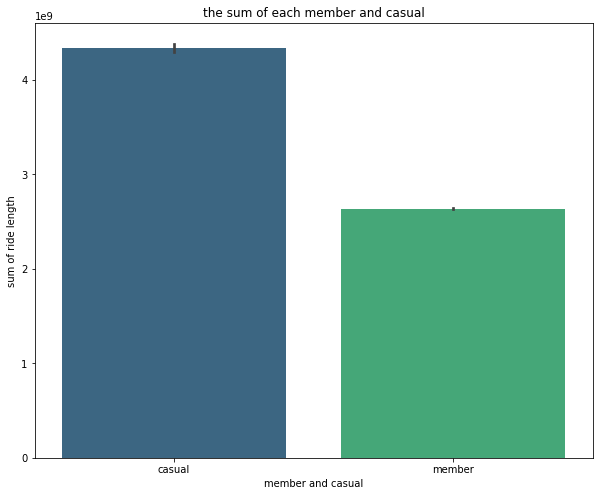

In [25]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='member_casual', 
            y='ride_length', data=bike, 
            estimator=sum, palette='viridis')

ax.set(title="the sum of each member and casual", xlabel = "member and casual", ylabel = "sum of ride length")


-**FINDING (3)**
- > As you can see in chart(1)  above, the sum of casual are  more than the sum of casual.

**chart(2)**

- the mean of ride length of each member and casual 

[Text(0, 0.5, 'Total ride'),
 Text(0.5, 0, 'member and casual'),
 Text(0.5, 1.0, 'The total of ride over the member and casual')]

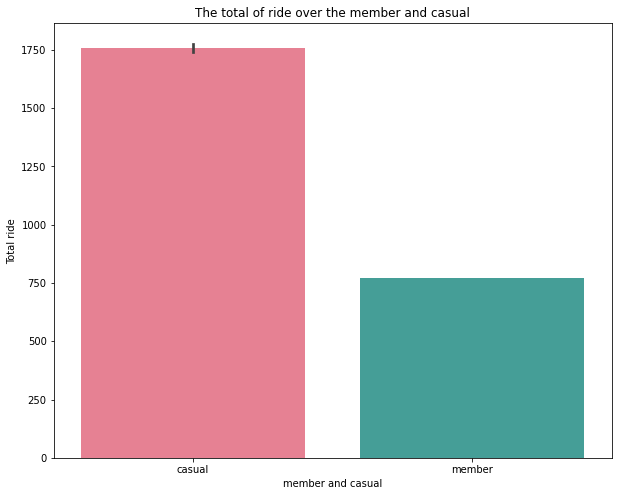

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='member_casual', 
                 y='ride_length',  
                  data=bike, palette="husl")
ax.set(title = "The total of ride over the member and casual", xlabel = "member and casual", ylabel = "Total ride")

-**FINDING (4)**

- > In chart(2), the mean ride length of the casual is up to 1500, while the member didn't reach 1000.


Now let's see the number of ride length in member and casual at hours

In [27]:
#the 
table = bike.groupby(['hour', 'member_casual']).agg({'ride_length':['sum', 'mean']})
table.sort_values


<bound method DataFrame.sort_values of                     ride_length             
                            sum         mean
hour member_casual                          
0    casual          89613166.0  1800.111807
     member          28918606.0   792.051875
1    casual          71153342.0  2169.706105
     member          18897836.0   832.503789
2    casual          47650506.0  2294.640566
     member          10642252.0   825.044732
3    casual          29671576.0  2448.149835
     member           6620405.0   838.875443
4    casual          20099725.0  2301.583076
     member           7403995.0   813.983619
5    casual          18468543.0  1397.121038
     member          22255769.0   656.009226
6    casual          38989718.0  1333.164125
     member          63122792.0   684.732953
7    casual          65461521.0  1235.799230
     member         124707051.0   711.895756
8    casual          94201801.0  1330.740666
     member         143511171.0   697.160427
9    casual     

**-FINDING (5)**

- The sum value of casual is **376053750** at five pm, (**17:00**), and the mean of it is 2448.15 at three am (**3**)
- The max vaule of member is **290209836** at five pm (**17:00**), and the mean value of the member is 838.9 , the same as casual at three am (**3**)

Lets make visual chart of what we say above. 
by first the mean or the average ride of both member and casual over the hour of a day, then seen the sum ride of each member and casual over hour of a day. 

chart(3): The average ride of each the member and casual over the hour of day


[Text(0, 0.5, 'average ride'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'The average ride of each the member and casual over the hour of day ')]

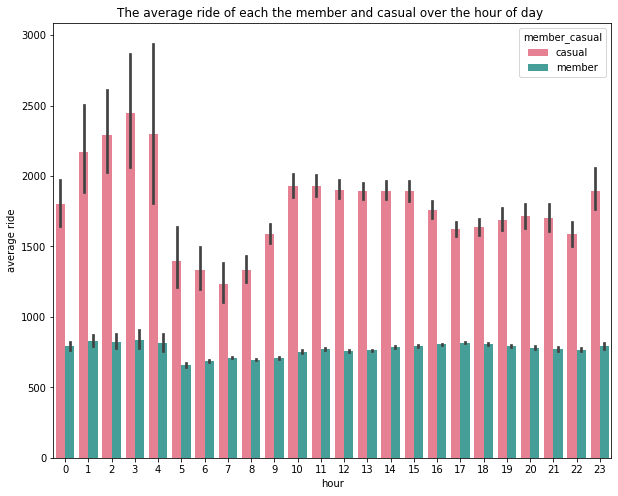

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='hour', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="husl")
ax.set(title = "The average ride of each the member and casual over the hour of day ", 
       xlabel = "hour", ylabel = "average ride")

-**FINDING (6)**
- > In the chart(3): there some pickes specaily in 3 am with highest error bars varaition, and that indicate to the high demand from casual customer 

chart(4): The sum ride of each the member and casual over the hour of day

[Text(0, 0.5, 'Total ride'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'The average ride of each the member and casual over the hour of day ')]

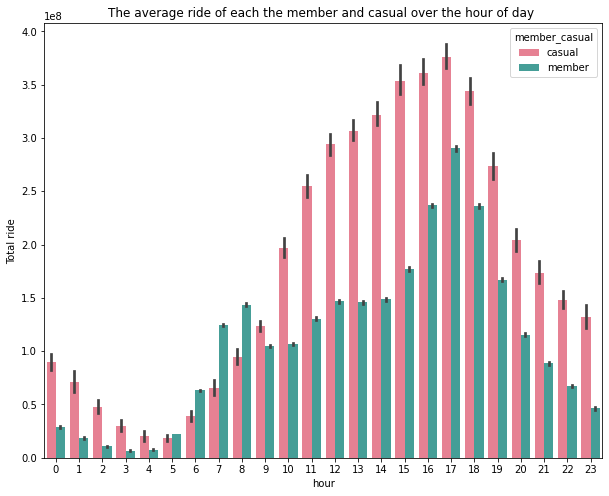

In [29]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='hour', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="husl", estimator=sum)
ax.set(title = "The average ride of each the member and casual over the hour of day ", 
       xlabel = "hour", ylabel = "Total ride")

-**Finding(7):**

- > In the chart(4): the demand keep increasing from 7 am to 8 pm for both member and casual. 


-compare the casual and member at weekday 

In [30]:
table = bike.groupby(['day_of_week', 'member_casual']).agg({'ride_length':['sum', 'mean']})
table.sort_values


<bound method DataFrame.sort_values of                            ride_length             
                                   sum         mean
day_of_week member_casual                          
Friday      casual         579017647.0  1673.330830
            member         356813857.0   755.673381
Monday      casual         523173875.0  1790.563053
            member         354693279.0   747.008915
Saturday    casual         980528463.0  1922.363592
            member         389591582.0   858.089656
Sunday      casual         897296333.0  2051.211536
            member         350128314.0   865.529483
Thursday    casual         486413798.0  1561.576165
            member         390158655.0   742.470613
Tuesday     casual         432323426.0  1554.991587
            member         392019038.0   730.705354
Wednesday   casual         440589441.0  1502.461904
            member         400297111.0   731.753756>

-**Finding(8):**
- > the max sum value for casual is 980528463 at Saturday, and mean at 2051.2 at Sunday.
-> the max sum value for member is 400297111  in Wednesday and the mean also at Sunday by 865.52


chart(5): The average ride of each the member and casual over the days of week 

[Text(0, 0.5, 'avreage ride'),
 Text(0.5, 0, 'day of week'),
 Text(0.5, 1.0, 'The average ride of each the member and casual over the day  of week')]

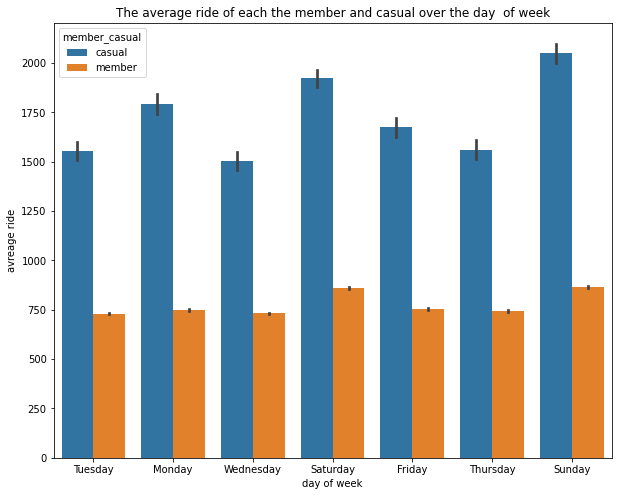

In [31]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='day_of_week', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10")
ax.set(title = "The average ride of each the member and casual over the day  of week", 
       xlabel = "day of week", ylabel = "avreage ride")

-**Finding(9):**
- > the memeber didn't exceed the mean of 1000 through out all seven days 
- > the casual are more varied secailly in sunday 

chart(6): The sum ride of each the member and casual over the days of week.

[Text(0, 0.5, 'Total ride'),
 Text(0.5, 0, 'day of week'),
 Text(0.5, 1.0, 'The total ride of each the member and casual over the day  of week')]

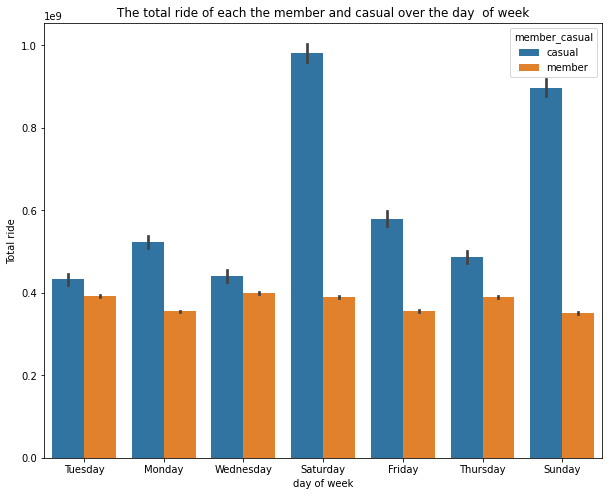

In [32]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='day_of_week', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10", estimator=sum)
ax.set(title = "The total ride of each the member and casual over the day  of week", 
       xlabel = "day of week", ylabel = "Total ride")

-**Finding(10)**
- > as you can see the chart(5) the highest value of ride are in Saturday and for casual, and wednesday for member 


##### let's see how the member and casual are behave differently in days 


In [33]:
table = bike.groupby(['day', 'member_casual']).agg({'ride_length':['sum',  'mean']})


-Finding(11): 

 - The sum value  of causal is 195326017.0 located in day 10 , and the mean of it is 2009.04 in day five.
 - Day 12 is highest sum value for member is 102655507.0	and thier greater mean is 803.23 located in day five  



chart(7): The total ride of each the member and casual over the days


[Text(0, 0.5, 'avreage ride'),
 Text(0.5, 0, 'days'),
 Text(0.5, 1.0, 'The average ride of each the member and casual over the days')]

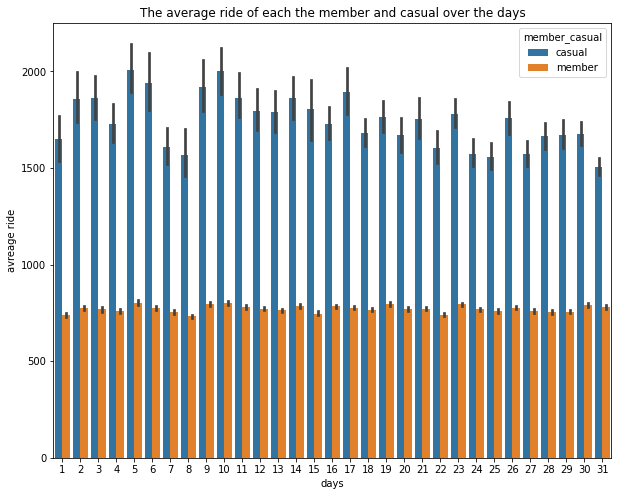

In [34]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='day', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10")
ax.set(title = "The average ride of each the member and casual over the days", 
       xlabel = "days", ylabel = "avreage ride")

-chart(8): The total ride of each the member and casual over the days




[Text(0, 0.5, 'total ride'),
 Text(0.5, 0, 'days'),
 Text(0.5, 1.0, 'The total ride of each the member and casual over the days')]

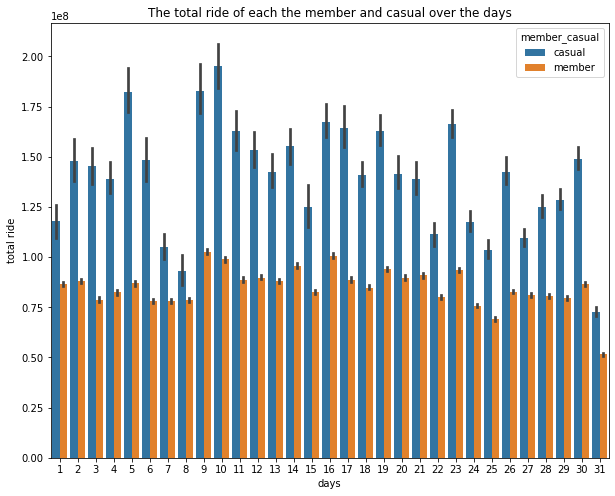

In [35]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='day', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10", estimator=sum)

ax.set(title = "The total ride of each the member and casual over the days", 
       xlabel = "days", ylabel = "total ride")

let's see the behaviour of member and casual in months 

In [36]:
table = bike.groupby(['month', 'member_casual']).agg({'ride_length':['sum', 'mean']})
table.sort_values

<bound method DataFrame.sort_values of                          ride_length             
                                 sum         mean
month     member_casual                          
April     casual         224004050.0  1771.945624
          member         168822497.0   689.544247
August    casual         631206095.0  1758.606543
          member         342910399.0   803.053805
December  casual          98306691.0  1409.657446
          member         117402011.0   660.296346
February  casual          34319291.0  1602.507051
          member          64459262.0   684.331766
January   casual          33755428.0  1822.647300
          member          61285423.0   718.890592
July      casual         713316133.0  1756.698312
          member         343592953.0   823.109225
June      casual         710814978.0  1926.061650
          member         336122603.0   839.985213
March     casual         175930668.0  1957.351505
          member         139309748.0   717.499732
May       c

- > the sum value for casual is 713316133 located in July, and mean is 1957.35 located at March.
- > the sum value for member is 343592953.0 in July, and thier mean is 839.98 at June

- chart(9): The averge ride of each the member and casual over the Months




[Text(0, 0.5, 'average ride'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'The averge ride of each the member and casual over the Months')]

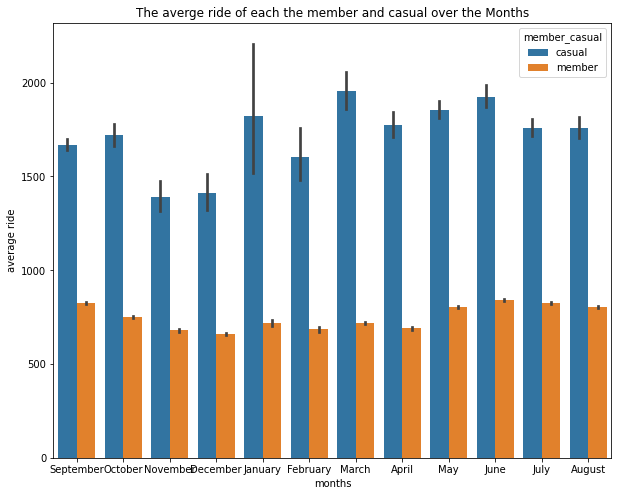

In [37]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='month', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10",)

ax.set(title = "The averge ride of each the member and casual over the Months", 
       xlabel = "months", ylabel = "average ride")

chart(10): The Total ride  of each the member and casual over the Months


[Text(0, 0.5, 'average ride'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'The sum ride of each the member and casual over the Months')]

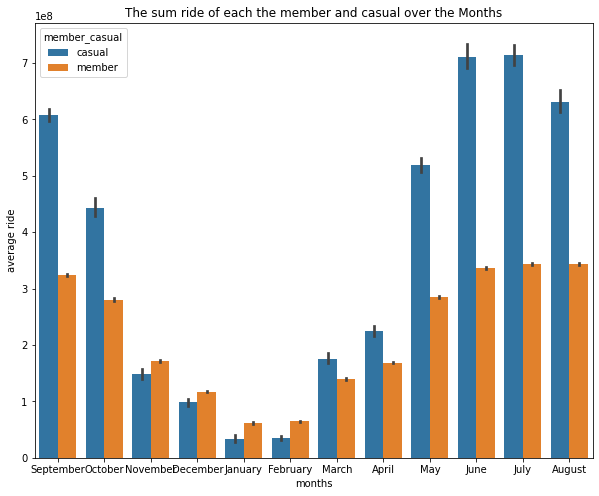

In [38]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='month', 
                 y='ride_length', hue='member_casual',  
                  data=bike, palette="tab10", estimator=sum)

ax.set(title = "The sum ride of each the member and casual over the Months", 
       xlabel = "months", ylabel = "average ride")

*RECOMMENDATIONS**
-Based on the findings 
- > first thing of my recommendations is we need to do more surveys on times that the casual is more or equal to member because it is important to know why some casual users didn't prefer to be casual 
- > we need to do some marketing campings at times that there huge demand by casual 
- > offer some discount for the membership especially for long rides and during summer and increasing the cost of casual for the long ride

EXPORT SUMMARY FILE FOR FURTHER ANALYSIS


In [ ]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,day,month,year,day_of_week,hour,minute,second,ride_length,ride_lengthMean
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.89,-87.68,...,casual,28,9,2021,Tuesday,16,7,10,164.0,1185.211725
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.94,-87.64,...,casual,28,9,2021,Tuesday,14,24,51,914.0,1185.211725
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.81,-87.72,...,casual,28,9,2021,Tuesday,0,20,16,221.0,1185.211725
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.80,-87.72,...,casual,28,9,2021,Tuesday,14,51,17,529.0,1185.211725
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,Clark St & Grace St,TA1307000127,Desplaines St & Kinzie St,TA1306000003,41.88,-87.74,...,casual,28,9,2021,Tuesday,9,53,12,632.0,1185.211725


In [ ]:
week = bike.groupby(['member_casual','day_of_week'])['ride_length'].agg(['mean', 'sum'])
day = bike.groupby(['member_casual','day'])['ride_length'].agg(['mean', 'sum'])
month = bike.groupby(['member_casual','month'])['ride_length'].agg(['mean', 'sum'])
hour = bike.groupby(['member_casual','hour'])['ride_length'].agg(['mean', 'sum'])

week.to_csv('bike_week.csv', index=False)
day.to_csv('bike_day.csv', index=False)
month.to_csv('bike_month.csv', index=False)
hour.to_csv('bike_hour.csv', index=False)

In [ ]:
bike.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day', 'month', 'year', 'day_of_week', 'hour',
       'minute', 'second', 'ride_length', 'ride_lengthMean'],
      dtype='object')